# Lecture 11
## From last class we learned about the Z-score or standard normal deviate.
## Let's investigate what happens (if anything) when we estimate the standard error

In [1]:
# Import packages

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

## Starting off like last week, let's define from the beginning the population parameters $\mu$ and $\sigma$.

Also define the population size (pick any large number). We can use `np.random.normal` to make a population that is normally distributed. Specifically all values in our population will be drawn from the normal distribution with our specified $\mu$ and $\sigma$ values.

In [2]:
# Population parameters
mu = 3
sigma = 2

population_size = 50000
population = np.random.normal(mu, sigma, population_size)

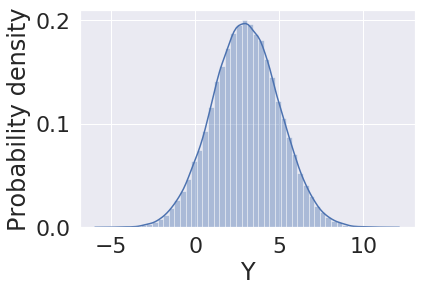

In [3]:
# We said the population values are normally distributed. Let's make a histogram to check by eye.

sns.set(font_scale = 2)
fig_0 = sns.distplot(population, kde = True)
fig_0.set(xlabel = 'Y', ylabel = 'Probability density');

In [ ]:
# Looks good. Pretty normal.

## Step 2. Sampling distribution of the mean.

Draw random samples of size `n` using the `np.random.choice` function. Specifcy the variable `n_samples` to determine the total number of random samples you would like to draw. Make sure `n_samples` is quite large so that we can safely assume we have sampled the population thoroughly. 

For each sample, calculate the sample mean $\bar{Y}$.

In [4]:
# Set a sample size n
n = 10

# Draw the sampling distribution of Ybar
n_samples = 10000   # How many different samples of size n exist?
Ybar_vec = np.zeros((n_samples))
for rep in range(n_samples):
    sample_from_population = np.random.choice(population, n)
    Ybar_vec[rep] = sample_from_population.mean()

print('Done drawing samples')    

Done drawing samples


## The distribution of Ybar is normal, right?

Draw a histogram to check by eye.

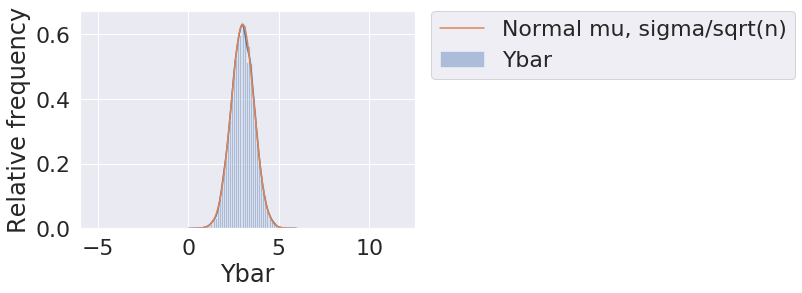

In [6]:
# The distribution of Ybar is normal, right?
fig_1 = sns.distplot(Ybar_vec, label = 'Ybar')
fig_1.set(xlim = (-6.0,12.5), xlabel = 'Ybar', ylabel = 'Relative frequency')

# What normal distribution should Ybar have? mu = mu, and then what is the standard deviation? 
# sigma_Ybar = sigma/np.sqrt(n)

# Draw on top a normal distribution with these values
norm_estimate_for_Ybar = stats.norm.pdf(Ybar_vec, loc = mu, scale = sigma/np.sqrt(n))
sns.lineplot(Ybar_vec, norm_estimate_for_Ybar, label = 'Normal mu, sigma/sqrt(n)')
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)


## Convert our sampling distribution to the standard normal distribution

Just like last time. 

$$ Z = \frac{\bar{Y}_i - \mu}{\sigma_{\bar{Y}}}$$

What assumptions must we make in order to appropriately perform this transformation?

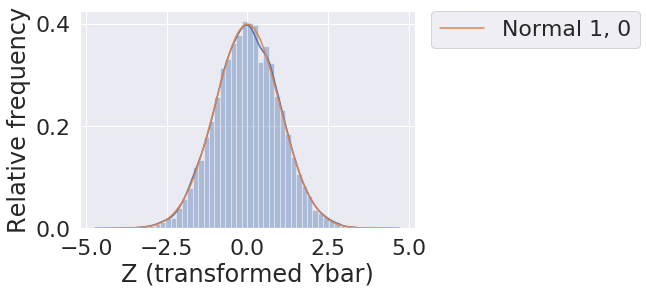

In [7]:
# Convert to standard normal
Z_from_Ybar = (Ybar_vec - mu)/(sigma/np.sqrt(n))

# Plot distribution
fig_2 = sns.distplot(Z_from_Ybar)

# Does this match the standard normal exactly?
norm_estimate_for_Z = stats.norm.pdf(Z_from_Ybar, loc = 0, scale = 1)
sns.lineplot(Z_from_Ybar, norm_estimate_for_Z, label = 'Normal 1, 0')
plt.xlabel('Z (transformed Ybar)')
plt.ylabel('Relative frequency')
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)


## Likely we will not know or even have a good guess of $\sigma$. Often we know the mean, but the standard deviation? Unlikely. 

What do we do if we don't know $\sigma$? Estimate it from our data of course! 
Repeat the proceedure of drawing random samples of size `n` from the population, but this time compute the sample standard error of the mean. Do you think the final standardized distribution will be the same?

In [8]:
## Realistically, we might have an idea of what the population mean is but the standard deviation? Unlikely.
## Let's see what happens when we have to actually estimate the standard deviation from the samples we draw...

# Same as above but now compute the sample standard error each time.
# Set a sample size n
n = 5

# Draw the sampling distribution of Ybar
n_samples = 10000
Ybar_vec = np.zeros((n_samples))
SE_vec = np.zeros((n_samples))
for rep in range(n_samples):
    sample_from_population = np.random.choice(population, n)
    Ybar_vec[rep] = sample_from_population.mean()
    SE_vec[rep] = np.std(sample_from_population, ddof = 1)/np.sqrt(n)

print('Done drawing samples')    

Done drawing samples


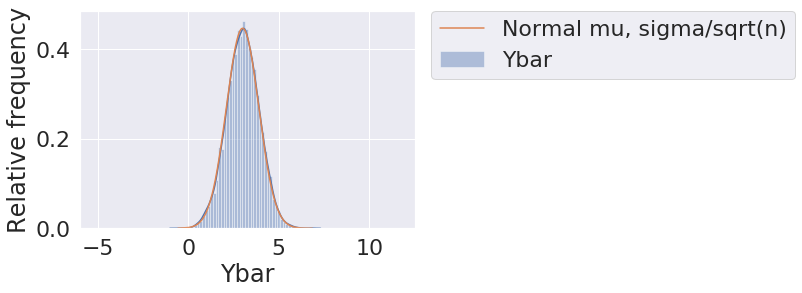

In [9]:
# The distribution of Ybar is normal, right? Let's plot again to check by eye.
fig_3 = sns.distplot(Ybar_vec, label = 'Ybar')
fig_3.set(xlim = (-6.0,12.5), xlabel = 'Ybar', ylabel = 'Relative frequency')

# What normal distribution should Ybar have? 
# Draw on top a normal distribution with the appropriate parameters
norm_estimate_for_Ybar = stats.norm.pdf(Ybar_vec, loc = mu, scale = sigma/np.sqrt(n))
sns.lineplot(Ybar_vec, norm_estimate_for_Ybar, label = 'Normal mu, sigma/sqrt(n)')
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)


## Now let's do the conversion to the standard normal like before but we'll use the sample standard error instead of the population standard deviation value.

So the transformation is...
$$\frac{\bar{Y}_i - \mu}{SE_{\bar{Y}}}$$

this time. We'll call the transformed values `Z_from_Ybar_est`. Let's see what the distribution looks like.

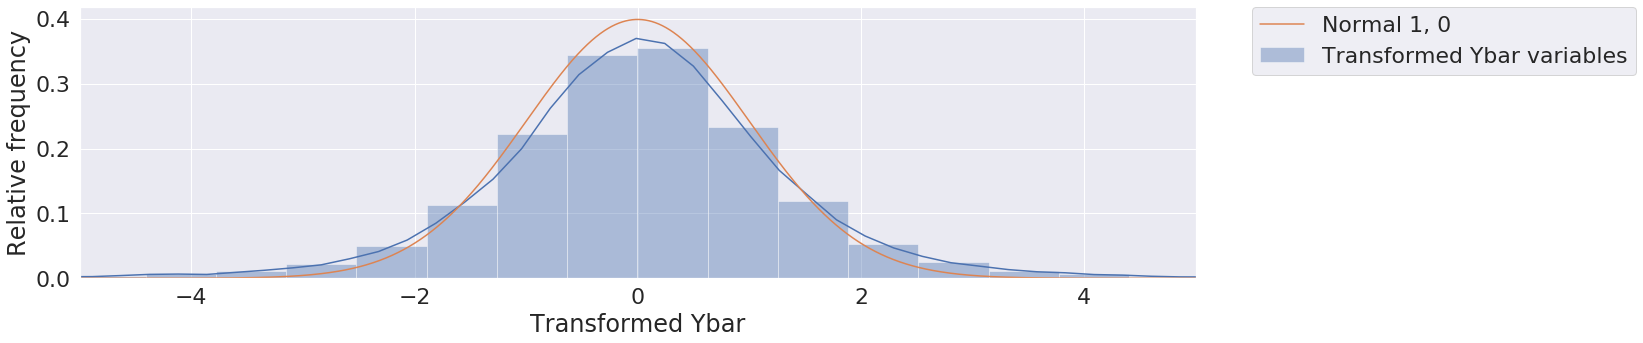

In [10]:
## Then we can convert to a standard normal distribution -- right? 
## Now we need to use our estimated standard errors instead of the true standard error.
Z_from_Ybar_est = (Ybar_vec - mu)/SE_vec

# Plot!
plt.figure(figsize=(20,5))
fig_4 = sns.distplot(Z_from_Ybar_est, label = 'Transformed Ybar variables')

# Does this match the standard normal exactly?
norm_estimate_for_Z_est = stats.norm.pdf(Z_from_Ybar_est, loc = 0, scale =1)
sns.lineplot(Z_from_Ybar_est, norm_estimate_for_Z_est, label = 'Normal 1, 0')
fig_4.set(xlim = (-5,5), xlabel = 'Transformed Ybar', ylabel = 'Relative frequency')
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
